# Reservas de Hotel
*Elaborado por: Manuel Hernandez | Maria Alejandra Jaime | Matias | Viridiana Valencia*

# Introducción

<div align="justify">La industria hotelera es una subdivisión de la industria de hospitalidad que se especializa en proveer a clientes con servicios de alojamiento. A nivel mundial, la industria involucra alrededor de 700.000 hoteles y resorts, que comprenden mas de 16.4 millones de habitaciones, 173 millones de empleados, y que tiene una valuación de mas de 570 billones de dólares.<sup>[1]</sup> Importantes cadenas a nivel mundial han surgido de la necesidad a medida que el viajar se ve mas como una parte integral de la vida, como lo son las cadenas Marriot International, Hilton Worldwide, InterContinental Hotels Group, y Wyndham Hotel Group; siendo la cadena Hilton la de mayor valuación a nivel mundial (10.83 billones de dólares).<sup>[2]</sup></div>

Los hoteles se clasifican por su tamaño, función, servicio y costo, entre otras métricas. En lo que se refiere a función, algunas categorías que podemos hallar en el mercado son hoteles de negocio, casinos, spas, bed & breakfast, y resorts. A medida que el viajar se ve mas como una parte integral de la vida, la industria ha ido creciendo con esta tendencia. Algunas métricas importantes para medir el éxito de un hotel a nivel económico son el costo diario promedio (average daily rate, ADR) y la tasa de ocupación del hotel, las cuales nos permiten estimar el ingreso bruto por cuarto disponible (revenue per available room, RevPAR), puesto que la multiplicación del ADR por la tasa de ocupación resulta en el RevPAR <sup>[3]</sup>. 

Para asegurar el éxito del negocio existen diversas estrategias para mejorar el RevPAR. En primer lugar se puede mirar al ADR, puesto que un ADR en aumento indica que el ingreso del establecimiento aumenta. Pero una estrategia basada en aumentar el costo de los servicios hoteleros al usuario resta competitividad en el mercado. Por ende, se puede ver a la tasa de ocupación como otra métrica que se puede mejorar a nivel del negocio para aumentar el ingreso del hotel. Es aquí donde la ciencia de datos puede ayudar al negocio a ser más exitoso, puesto que nos permite detectar oportunidades de negocio basadas en datos y tendencias.</div>

<div align="justify"> En el presente documento se explora el caso de dos hoteles ubicados en la ciudad de Lisboa, uno de ellos categorizado como hotel de ciudad y el segundo como hotel resort. La intención de utilizar esta información es explorar los datos en busca de posibles situaciones que nos permitan conocer el perfil del cliente que tiende a tener un consumo mayor, y poder detectar que tipos de reservaciones son mas susceptibles a cancelación, de modo que se puedan disponibilizar a los clientes la mayor cantidad de habitaciones posibles, y por ende manejar una tasa de ocupación más alta. La data incluye información como la candidad de adultos, niños y bebés hospedados, el número de espacios de estacionamiento, fechas de llegada, entre otros.</div>

*Fuentes:*
Dataset Obtenido de [Kaggle - Hotel Bookings](https://www.kaggle.com/mojtaba142/hotel-booking) 

<sup>[1]</sup> **Hotel Industry Statistics.** Statista. https://www.condorferries.co.uk/hotel-industry-statistics

<sup>[2]</sup> **Hotel  industry worldwide - statistics &  facts.** Condor Ferries. https://www.statista.com/topics/1102/hotels/

<sup>[3]</sup> **Average Daily Rate.** Investopedia. https://www.investopedia.com/terms/a/average-daily-rate.asp

# Objetivo General del Proyecto
 Desarrollar un modelo que permita predecir si una reserva se cancelará o no.

## Preguntas de investigación

1. ¿Cuántas reservaciones fueron canceladas?
2. ¿Cual es la proporción entre reservaciones en el hotel resort y el de ciudad?
3. ¿Cuál es el porcentaje de reservaciones por año?
4. ¿Cuáles son los meses de mayor afluencia de huéspedes?
5. ¿De qué país vienen la mayor parte de huéspedes?
6. ¿Cuánto tiempo se quedan los huéspedes?
7. ¿Qué tipo de estancias son más frecuentes?
8. ¿Cuál es la distribución del ADR a través de los distintos meses del año?
9. ¿Cuáles tipos de huéspedes presentan un mayor ADR?

# Data Acquisition
Para elaborar el analisis se cuenta con un archivo csv que se logró recuperar del artículo "Hotel booking demand datasets" (Nuno, Almeida, Nunes; 2019) construido desde las bases de datos dispuestos por los hoteles estudiados.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pandas_profiling

In [2]:
df = pd.read_csv('hotel_booking.csv')
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


# Data Wrangling

En primer lugar, se debe manipular la data para modificar o eliminar registros, bien sea porque no son relevantes al estudio, necesiten algún tipo de edición para su uso dentro del modelo predictivo, o presenten valores desconocidos que requieran ser imputados o eliminados, entre otros. Para ello, empezaremos por conocer los tipos de datos y las cantidades de registros existentes de cada feature del dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

En base a la información vista, se realizarán una serie de modificaciones para mejorar la calidad del dataset. Ellas son:
* Se eliminarán las features agent y company, puesto que presentan una alta cantidad de valores missing.
* Se eliminarán las features name, email, phone-number y credit_card, debido a que al ser features que presentan distintos valores para cada cliente nuevo, estas variables no son de importancia para el modelo.
* Se imputaran valores para los registros en los cuales la variable children o country no presenten data. En el caso de children, se asume que la reservación no presenta niños así que se asigna el valor 0; mientras que en el caso de country se indica que el país no está disponible.
* Se eliminarán los registros en los cuales no hayan huéspedes adultos asociados pero existan huéspedes de otro tipo (children o babies).
* Se eliminarán los registros en los cuales la cantidad de huéspedes adultos es igual a cero.
* Se eliminarán los registros en los cuales el adr es menor a 0 o mayor a 400.
* Se eliminarán los registros en los cuales el tipo de habitacion sea P ó L.



* Se agregarán nuevas features: 
    * total_guests, el cual será la suma del total de huéspedes de tipo adults, children o babies asociados a cada reservación.
    * total_stay_in_nights, el cual será la suma del total de días, tanto de semana como de fín de semana, asociados a la reservación.
    * has_minors, el cual indica si hay huéspedes del tipo children o babies en la reserva (1) o no (0)
    * room_type_changed, el cual indica si el tipo de habitación asignada a la llegada al hotel es distinta al tipo de habitación reservada (1) o no (0).
    * cancelations_ratio, el cual indica si el huésped tiene una mayor cantidad de reservaciones previas canceladas (1) que de reservaciones no canceladas (0).

# Eliminar: agent, company, name, email, phone, credit card

In [15]:
prelim_df = df.copy()
prelim_df = prelim_df.drop(columns=["agent", "company", "name", "email", "phone-number", "credit_card"], axis=1)
prelim_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Valores Missing

In [16]:
features = prelim_df.columns.to_series()
nan_counts = prelim_df.count()
df_nan = pd.DataFrame(nan_counts).set_index(features)
filt = df_nan[0] != df.shape[0]
df_nan[filt]

,0
children,119386
country,118902


In [17]:
# Children
prelim_df.children.fillna(0,inplace=True)
df_nan = pd.DataFrame(prelim_df.count()).set_index(features)
df_nan[filt]

,0
children,119390
country,118902


In [18]:
# Country
prelim_df.country.fillna('Unavailable',inplace=True)
df_nan = pd.DataFrame(prelim_df.count()).set_index(features)
df_nan[filt]

,0
children,119390
country,119390


# Eliminar registros donde no hayan huéspedes adultos.

In [19]:
# Cambiamos el tipo de variable de children a int
prelim_df["children"] = prelim_df["children"].astype(int)

In [20]:
# Revisa si adultos == 0 y si es asi cambia adultos = 1 y niños = 0
no_adult_df = prelim_df[(prelim_df["adults"] == 0) & ((prelim_df["children"] != 0)|(prelim_df["babies"] != 0) )]["adults"]
print("Registros que no tienen huespedes adultos pero huespedes de otro tipo -> ", no_adult_df.count())
print("Dimension del dataframe actual -> ", prelim_df.shape)

Registros que no tienen huespedes adultos pero huespedes de otro tipo ->  223
Dimension del dataframe actual ->  (119390, 30)


In [21]:
## Elimina los registros que cumplen la condicion anterior
prelim_df = prelim_df.drop(no_adult_df.index)
print("Dimension del dataframe actual -> ", prelim_df.shape)

Dimension del dataframe actual ->  (119167, 30)


# Nuevas Features
## Feature total huespedes (total_guests)

In [22]:
prelim_df["total_guests"] = prelim_df["adults"] + prelim_df["children"] + prelim_df["babies"]
prelim_df.head().T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2


## Feature total días en el hotel (total_stay_in_nights)

In [23]:
prelim_df["total_stay_in_nights"] = prelim_df["stays_in_week_nights"] + prelim_df["stays_in_weekend_nights"]
prelim_df.head().T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2


In [24]:
# Cantidad de registros que tienen noches = 0 y que no fueron cancelados --- Son todos Check-Out
nfilt = (prelim_df["total_stay_in_nights"] == 0) & (prelim_df["is_canceled"] != 1)
prelim_df[nfilt]["reservation_status"].value_counts()

Check-Out    680
Name: reservation_status, dtype: int64

## Feature que indique si hay niños en la reserva (has_minors)

In [25]:
prelim_df["total_minors"] = prelim_df["children"] + prelim_df["babies"]
minors_filt = prelim_df["total_minors"] > 0
prelim_df[minors_filt]["total_minors"].value_counts()

1     5442
2     3567
3       97
10       2
9        1
Name: total_minors, dtype: int64

In [26]:
def hasMinors(minors):
    val = 0
    if (minors > 0):
        val = 1
    return val

prelim_df["total_minors"] = prelim_df["total_minors"].apply(hasMinors)
prelim_df = prelim_df.rename(columns={"total_minors": "has_minors"})
prelim_df.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0
lead_time,342,737,7,13,14,14,0,9,85,75,23,35,68,18,37
arrival_date_year,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July,July,July,July,July,July,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2,2,2,2,3,3,4,4,4,4,4
adults,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2


# Feature binario que compare el tipo de cuarto asignado con el tipo de cuarto reservado e indique si este cambió (room_type_changed)

In [27]:
# Asumo que para todos los registros assigned_room_type y reserved_room_type son iguales, asignandole cero inicialmente
prelim_df["room_type_changed"] = 0 
room_filt = (prelim_df["assigned_room_type"] != prelim_df["reserved_room_type"])
prelim_df.loc[room_filt, "room_type_changed"] = 1
prelim_df["room_type_changed"].value_counts()

0    104282
1     14885
Name: room_type_changed, dtype: int64

## Feature binario que indique si el cliente ha tenido más cancelaciones que estadías (cancelations_ratio)

In [28]:
prelim_df['cancelations_ratio'] = 0
prelim_df.loc[ prelim_df['previous_cancellations'] > prelim_df['previous_bookings_not_canceled'] , 'cancelations_ratio'] = 1

In [29]:
prelim_df.head(10).T

,0,1,2,3,4,5,6,7,8,9
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0,0,0,0,1,1
lead_time,342,737,7,13,14,14,0,9,85,75
arrival_date_year,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2,2,2,2,3,3
adults,2,2,1,1,2,2,2,2,2,2


# Eliminaciones

## Registros donde la cantidad de Adultos es igual a cero

In [30]:
prelim_df[(prelim_df["adults"] == 0)]["adults"].count()

180

In [31]:
adults_filt = (prelim_df["adults"] == 0)
prelim_df = prelim_df.drop(prelim_df[adults_filt].index)
prelim_df[(prelim_df["adults"] == 0)]["adults"].count()

0

## Registros con adr negativo o adr mayor a 400

In [32]:
adr_filt = (prelim_df["adr"] < 0) | (prelim_df["adr"] > 300)
len(prelim_df[adr_filt])

277

In [33]:
print("Valor máximo de ADR en el dataset --> ", prelim_df["adr"].max())
print("Valor mínimo de ADR en el dataset --> ", prelim_df["adr"].min())

Valor máximo de ADR en el dataset -->  5400.0
Valor mínimo de ADR en el dataset -->  -6.38


In [34]:
adr_filt = (prelim_df["adr"] < 0) | (prelim_df["adr"] > 300)
prelim_df = prelim_df.drop(prelim_df[adr_filt].index)
print("Valor máximo de ADR en el dataset --> ", prelim_df["adr"].max())
print("Valor mínimo de ADR en el dataset --> ", prelim_df["adr"].min())

Valor máximo de ADR en el dataset -->  300.0
Valor mínimo de ADR en el dataset -->  0.0


## Registros con tipos de habitacion P y L

In [35]:
assigned_filt = (prelim_df["assigned_room_type"] == 'P') | (prelim_df["assigned_room_type"] == 'L')
reserved_filt = (prelim_df["reserved_room_type"] == 'P') | (prelim_df["reserved_room_type"] == 'L')
prelim_df[assigned_filt | reserved_filt][["assigned_room_type", "reserved_room_type"]].value_counts()

assigned_room_type  reserved_room_type
A                   L                     1
B                   L                     1
C                   L                     1
F                   L                     1
H                   L                     1
L                   L                     1
dtype: int64

In [36]:
prelim_df = prelim_df.drop(prelim_df[assigned_filt | reserved_filt].index)
len(prelim_df[assigned_filt | reserved_filt][["assigned_room_type", "reserved_room_type"]])

0

# Modificación de tipo de datos 
## Features is_canceled, is_repeated_guest, more_cancelations, room_type_changed y has_minors se convierten a tipo object

In [37]:
prelim_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118704 entries, 0 to 119389
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118704 non-null  object 
 1   is_canceled                     118704 non-null  int64  
 2   lead_time                       118704 non-null  int64  
 3   arrival_date_year               118704 non-null  int64  
 4   arrival_date_month              118704 non-null  object 
 5   arrival_date_week_number        118704 non-null  int64  
 6   arrival_date_day_of_month       118704 non-null  int64  
 7   stays_in_weekend_nights         118704 non-null  int64  
 8   stays_in_week_nights            118704 non-null  int64  
 9   adults                          118704 non-null  int64  
 10  children                        118704 non-null  int32  
 11  babies                          118704 non-null  int64  
 12  meal            

In [38]:
prelim_df[['is_canceled', 'is_repeated_guest', 'cancelations_ratio', 'room_type_changed', 'has_minors']] = prelim_df[['is_canceled', 'is_repeated_guest', 'cancelations_ratio', 'room_type_changed', 'has_minors']].astype('object')
prelim_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118704 entries, 0 to 119389
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118704 non-null  object 
 1   is_canceled                     118704 non-null  object 
 2   lead_time                       118704 non-null  int64  
 3   arrival_date_year               118704 non-null  int64  
 4   arrival_date_month              118704 non-null  object 
 5   arrival_date_week_number        118704 non-null  int64  
 6   arrival_date_day_of_month       118704 non-null  int64  
 7   stays_in_weekend_nights         118704 non-null  int64  
 8   stays_in_week_nights            118704 non-null  int64  
 9   adults                          118704 non-null  int64  
 10  children                        118704 non-null  int32  
 11  babies                          118704 non-null  int64  
 12  meal            

# Reinicio de los indices post Data Wrangling

In [39]:
data = prelim_df.copy()
data.reset_index()
print('Dimensiones iniciales --> ', df.shape)
print('Dimensiones luego de Data Wrangling --> ', data.shape)
print('Registros Eliminados --> ', df.shape[0]- data.shape[0])
print('Registros Eliminados (%) --> ', (df.shape[0]- data.shape[0])*100/df.shape[0])

Dimensiones iniciales -->  (119390, 36)
Dimensiones luego de Data Wrangling -->  (118704, 35)
Registros Eliminados -->  686
Registros Eliminados (%) -->  0.5745874863891448


# Diccionario de Datos

A continuación se facilita una lista con los nombres de las variables en el dataset final, el tipo de dato, y su descripción.

| Variable                    | Tipo   | Descripción                                             | 
|-----------------------------|--------|---------------------------------------------------------|
| ADR                         | Float  | Tarifa diaria promedio                                  |
| Adults                      | Int    | Cantidad de adultos registrados                         |
| Agent                       | Object | ID de la agencia que reservo la habitación              |
| ArrivalDateDayOfMonth       | Int    | Día del mes de llegada                                  |
| ArrivalDateMonth            | Object | Mes de llegada                                          |
| ArrivalDateWeekNumber       | Int    | Semana del año de llegada                               |
| ArrivalDateYear             | Int    | Año de llegada                                          |
| AssignedRoomType            | Object | Tipo de habitación asignada                             |
| Babies                      | Int    | Bebés regitrados en la habitación                       |
| BookingChanges              | Int    | Cambios en la reservación                               |
| Children                    | Int    | Cantidad de niños registrados                           |
| Company                     | Object | ID de la compañía que hizo la reserva                   |
| Country                     | Object | País de origen del huésped formato ISO 3155–3:2013      |
| CustomerType                | Object | Tipo de cliente **Contract:** Clientes que tienen algún tipo de contrato relacionado con su reserva. **Group:** Habitaciones reservadas en grupo. **Transient:** Reservas que no estan asociadas a ningún contrato, grupo u otro cliente transitorio. **Transient-party:** Clientes transitorios que tienen alguna relación con otra habitación de algún cliente transitorio.                                                                       |
| DaysInWaitingList           | Int    | Cantidad de días en lista de espera                     |
| DepositType                 | Object | Indica si el cliente hizo algún deposito puede tener tres categorias: **No Deposit:** Cuando el cliente no dejó depósito. **Non Refund:** Cuando el depósito no es reembolsable. **Refundable:** Cuando el depósito es reembolsable.                                                                                 |
| DistributionChannel         | Object | Canal de distribución de la reserva. **TA:** Para agencias de viaje. **TO:** Para operadores de Tour.                                                                              |
| has_infants                 | Int    | Indica si en la reservación se registraron menores      |
| is_canceled                  | Object | Indica si la reserva se canceló. **1** para canceladas y **0** para no canceladas.                                                                                                      |
| IsRepeatedGuest             | Object | Indica si el nombre de la reserva ha sido registrado antes. **1** para clientes repetido y **0** para nuevos registros.                                                          |
| LeadTime                    | Int    | Cantidad de días que pasan entre la reservación y el día de llegada.                                                                                                                    |
| MarketSegment               | Object | Segmento de mercado. **TA:** Para agencias de viaje. **TO:** Para operadores de Tour.                                                                                                  |
| Meal                        | Object | Tipo de comidas reservadas. **Undefined/SC:** No se le asignó paquete de comidas. **BB:** Desayuno incluido. **HB:** Desayuno y cena. **FB:** Desayuno, comida y cena.             |
| PreviousBookingsNotCanceled | Int    | Cantidad de reservas anteriores que no fueron canceladas|
| PreviousCancellations       | Int    | Canidad de reservas anteriores que fueron canceladas    |
| RequiredCarParkingSpaces   | Int    | Cantidad de espacios de estacionamiento solicictados    |
| ReservationStatus           | Object | Estatus de la reservación **Canceled:** Reserva cancelada por el cliente. **Check-Out:** El cliente salió del hotel. **No-Show:** El cliente no hizo check-in y no informó al hotel.                                                                                |
| ReservationStatusDate       | Date   | Fecha en la que se hizo el último cambio de estatus     |
| ReservedRoomType            | Object | Clave del tipo de havitación reservada                  |
| StaysInWeekendNights        | Int    | Noches de estancia en fin de semana                     |
| StaysInWeekNights           | Int    | Noches de estancia entre semana                         |
| total_stay_in_nights        | Int    | Noches de estancia
| Total_guests                | Int    | Cantidad total de huéspedes (Adultos+Niños+bebés)       |
| TotalOfSpecialRequests      | Int    | Cantidad de solicitudes especiales del cliente          |

# Exploratory Data Analysis (EDA)
## 1. ¿Cuántas reservaciones fueron canceladas?

In [40]:
cancelados = data['is_canceled'].value_counts()/data['is_canceled'].count() * 100
cancelados

0    62.911107
1    37.088893
Name: is_canceled, dtype: float64

<Figure size 1440x576 with 0 Axes>

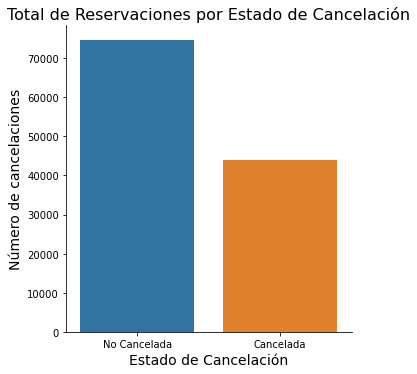

In [41]:
canceled_data = data.copy()
canceled_data["is_canceled"] = canceled_data["is_canceled"].replace({0:"No Cancelada", 1:"Cancelada"})
plt.figure(figsize=(20,8))
sns.catplot(x="is_canceled", data=canceled_data, kind="count")
plt.title("Total de Reservaciones por Estado de Cancelación", fontsize=16)
plt.ylabel("Número de cancelaciones", fontsize=14)
plt.xlabel("Estado de Cancelación", fontsize=14)
plt.show()

### Las reservas canceladas equivalen a 37.08% 

In [42]:
no_cancelados = data[data['is_canceled'] == 0]

## 2. ¿Cual es la proporción entre reservaciones en el hotel resort y el de ciudad?

In [43]:
tipo_hotel = no_cancelados['hotel'].value_counts()/no_cancelados['hotel'].count() * 100
tipo_hotel

City Hotel      61.483971
Resort Hotel    38.516029
Name: hotel, dtype: float64

<Figure size 1440x576 with 0 Axes>

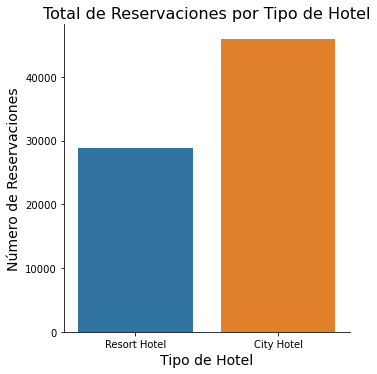

In [44]:
plt.figure(figsize=(20,8))
sns.catplot("hotel", data=no_cancelados, kind="count")
plt.title("Total de Reservaciones por Tipo de Hotel", fontsize=16)
plt.xlabel("Tipo de Hotel", fontsize=14)
plt.ylabel("Número de Reservaciones", fontsize=14)
plt.show()

### Más del 66% de las reservaciones se realizan en el hotel de ciudad.

## 3. ¿Cuál es el porcentaje de reservaciones por año?

In [45]:
reservas_anio = no_cancelados['arrival_date_year'].value_counts()/no_cancelados['arrival_date_year'].count() * 100
reservas_anio

2016    48.378371
2017    33.128900
2015    18.492729
Name: arrival_date_year, dtype: float64

<Figure size 1440x576 with 0 Axes>

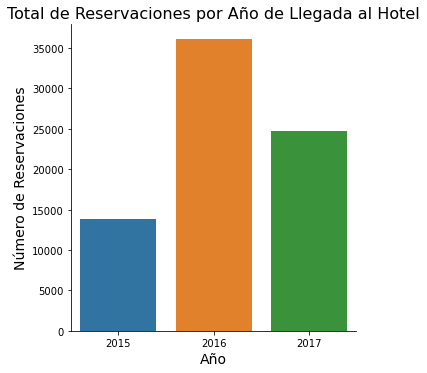

In [54]:
plt.figure(figsize=(20,8))
sns.catplot("arrival_date_year", data=no_cancelados, kind="count")
plt.title("Total de Reservaciones por Año de Llegada al Hotel", fontsize=16)
plt.xlabel("Año", fontsize=14)
plt.ylabel("Número de Reservaciones", fontsize=14)
plt.show()

### Durante el 2016 se realizaron más del doble de las reservaciones que en el año anterior, pero decrecieron aproximadamente 15% el año siguiente.

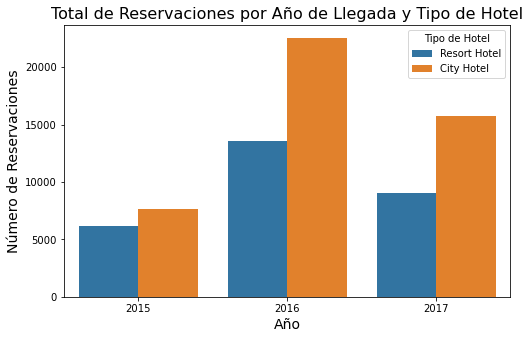

In [55]:
plt.figure(figsize=(8,5))
sns.countplot(x='arrival_date_year', hue='hotel',  data = no_cancelados)
plt.title("Total de Reservaciones por Año de Llegada y Tipo de Hotel", fontsize=16)
plt.xlabel("Año", fontsize=14)
plt.ylabel("Número de Reservaciones", fontsize=14)
plt.legend(title="Tipo de Hotel")
plt.show()

## 4. ¿Cuáles son los meses de mayor afluencia de huéspedes?

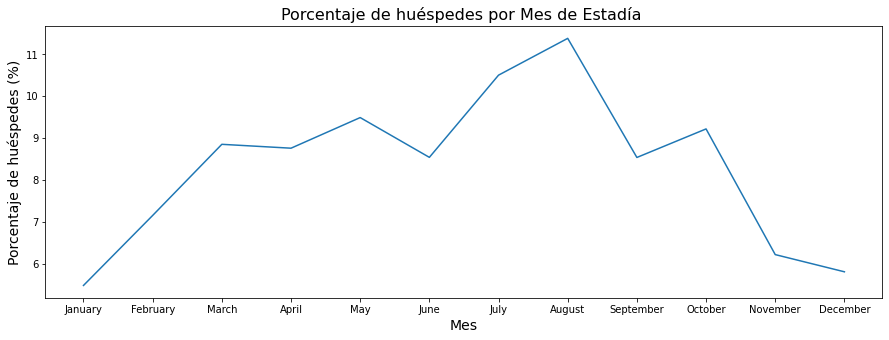

In [56]:
meses = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']

plt.subplots(figsize=(15,5))
ordenar_meses = no_cancelados['arrival_date_month'].value_counts().reindex(meses)

x = ordenar_meses.index
y = ordenar_meses/ordenar_meses.sum()*100   


sns.lineplot(x, y.values)
plt.title("Porcentaje de huéspedes por Mes de Estadía ", fontsize=16)
plt.xlabel("Mes", fontsize=14)
plt.ylabel("Porcentaje de huéspedes (%)", fontsize=14)
plt.show()

### Se puede observar que los meses más ocupados son julio y agosto.

## 5. ¿De qué país vienen la mayor parte de huéspedes?

In [57]:
pais = no_cancelados['country'].value_counts()[:15]/no_cancelados['arrival_date_year'].count() * 100
pais

PRT    27.927904
GBR    12.919468
FRA    11.300517
ESP     8.475053
DEU     8.108144
IRL     3.395913
ITA     3.240580
BEL     2.477303
NLD     2.287153
USA     2.121107
BRA     1.857307
CHE     1.726077
AUT     1.381933
CN      1.371220
SWE     1.059214
Name: country, dtype: float64

In [60]:
import pycountry as pc
paises_df = no_cancelados.copy()
def country_flag(df):
    list_alpha_2 = [i.alpha_2 for i in list(pc.countries)]
    list_alpha_3 = [i.alpha_3 for i in list(pc.countries)] 
    if (len(df['country'])==2 and df['country'] in list_alpha_2):
        return pc.countries.get(alpha_2=df['country']).name
    elif (len(df['country'])==3 and df['country'] in list_alpha_3):
        return pc.countries.get(alpha_3=df['country']).name
    else:
        return 'Invalid Code'

paises_df['country_name']=paises_df.apply(country_flag, axis = 1)
paises_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests,total_stay_in_nights,has_minors,room_type_changed,cancelations_ratio,country_name
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Check-Out,2015-07-01,2,0,0,0,0,Portugal
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Check-Out,2015-07-01,2,0,0,0,0,Portugal
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Check-Out,2015-07-02,1,1,0,1,0,United Kingdom
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Check-Out,2015-07-02,1,1,0,0,0,United Kingdom
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,1,Check-Out,2015-07-03,2,2,0,0,0,United Kingdom


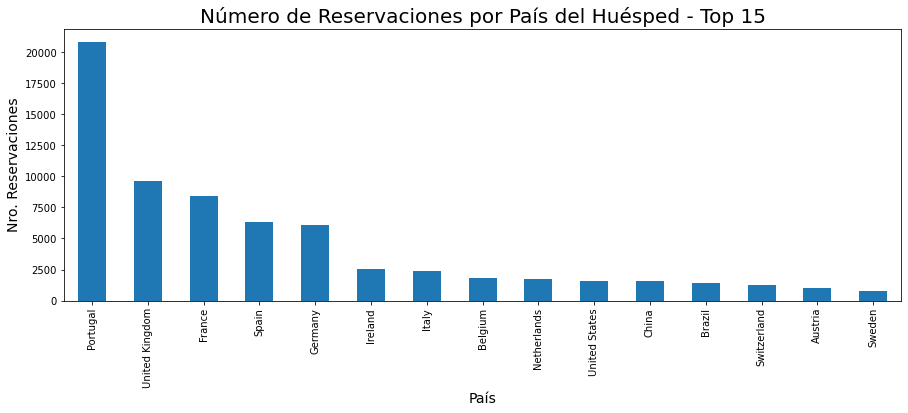

In [61]:
plt.figure(figsize=(15,5))
paises_df['country_name'].value_counts()[:15].plot(kind='bar');
plt.title('Número de Reservaciones por País del Huésped - Top 15', size=20)
plt.xlabel('País',size=14)
plt.ylabel('Nro. Reservaciones',size=14)
plt.show()

### El 68% de los huespedes provienen de Portugal, Reino Unido, Francia, España y Alemania.

## 6. ¿Cuánto tiempo se quedan los huéspedes?

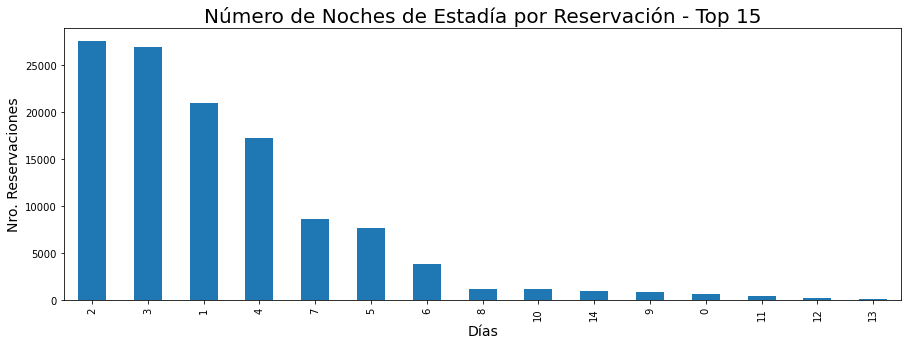

In [ ]:
plt.figure(figsize=(15,5))
data['total_stay_in_nights'].value_counts()[:15].plot(kind='bar');
plt.title('Número de Noches de Estadía por Reservación - Top 15', size=20)
plt.xlabel('Días',size=14)
plt.ylabel('Nro. Reservaciones',size=14)
plt.show()

## 7. ¿Qué tipo de estancias son más frecuentes?

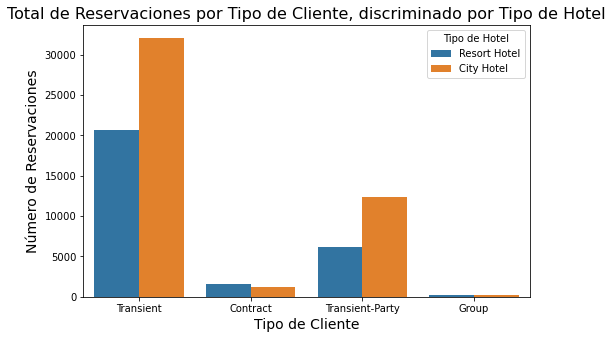

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='customer_type', hue='hotel',  data = no_cancelados)
plt.title("Total de Reservaciones por Tipo de Cliente, discriminado por Tipo de Hotel", fontsize=16)
plt.xlabel("Tipo de Cliente", fontsize=14)
plt.ylabel("Número de Reservaciones", fontsize=14)
plt.legend(title="Tipo de Hotel")
plt.show()

## 8. ¿Cuáles tipos de huéspedes presentan un mayor ADR?

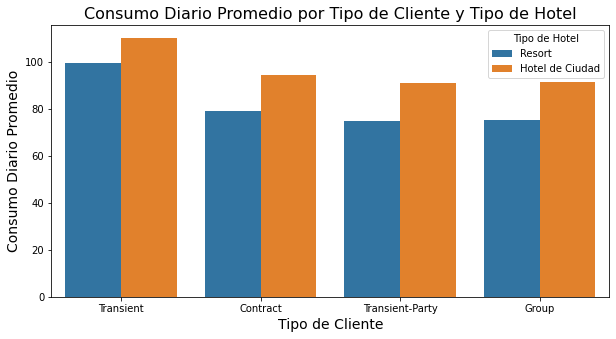

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=data, x="customer_type" , y="adr", hue="hotel", ci=None)
plt.title('Consumo Diario Promedio por Tipo de Cliente y Tipo de Hotel', fontsize=16)
plt.ylabel('Consumo Diario Promedio', fontsize=14)
plt.xlabel('Tipo de Cliente', fontsize=14)
plt.legend(title="Tipo de Hotel", labels=["Resort", "Hotel de Ciudad"])
plt.show()

### Se puede observar que el ingreso promedio por habitación es mayor en el grupo de clientes transitorios, tanto para hoteles de ciudad como resorts.

## 9. ¿Cuál es la distribución del ADR a través de los distintos meses del año?

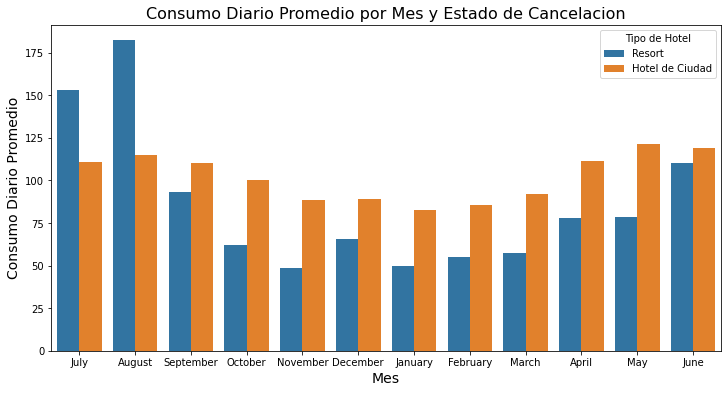

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=data, x="arrival_date_month" , y="adr", hue="hotel", ci=None)
plt.title('Consumo Diario Promedio por Mes y Estado de Cancelacion', fontsize=16)
plt.ylabel('Consumo Diario Promedio', fontsize=14)
plt.xlabel('Mes', fontsize=14)
plt.legend(title="Tipo de Hotel", labels=["Resort", "Hotel de Ciudad"])
plt.show()

### Se puede ver que para los hoteles de tipo resort los meses de Julio y Agosto son los que mayor ADR presentan, además la diferencia entre estos meses y los demás es sustancial, siendo estos los meses de mayor ingreso. Mientras tanto para el hotel de ciudad el ADR presenta diferencias menos marcadas alrededor del año, siendo los meses de mas ingreso Mayo y Junio. 

## Heatmap de correlaciones de variables

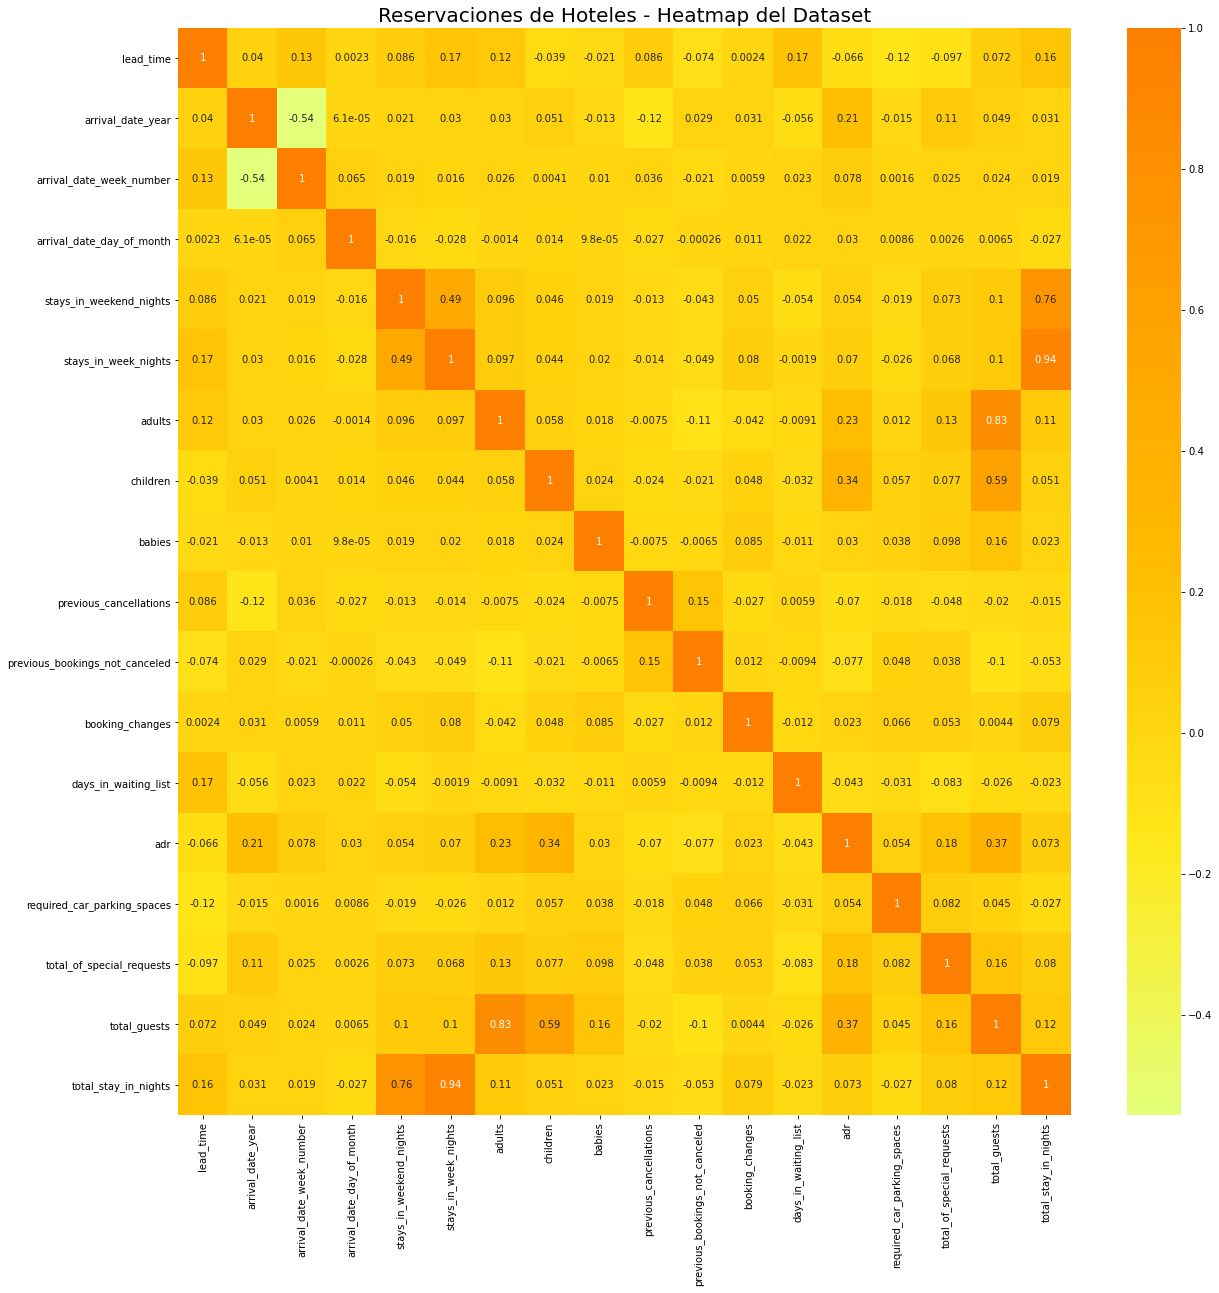

In [ ]:
plt.rcParams['figure.figsize'] = (20, 20)
sns.heatmap(data.corr(), annot = True, cmap = 'Wistia')
plt.title('Reservaciones de Hoteles - Heatmap del Dataset', fontsize = 20)
plt.show()